
# HomeWork 10

**DeadLine : 23;59 12 Azar 1398**

**Total points : 100pts**

Import some prerequisites.

In [70]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from collections import OrderedDict
from scipy.spatial import distance as dist

Run this cell for plotting.

In [71]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

# PART 3

**Point : 35 pts**

Here is for your helper functions(optional).

In [88]:
def detect(c):
    
    shape = "unidentified"
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.04 * peri, True)
    
    if len(approx) == 3:
        shape = "triangle"
    elif len(approx) == 4:
        (x, y, w, h) = cv2.boundingRect(approx)
        ar = w / float(h)
        shape = "square" if ar >= 0.95 and ar <= 1.05 else "rectangle"
    elif len(approx) == 5:
        shape = "pentagon"
    else:
        shape = "circle"

    return shape


def color_label(image, c):
    colors = OrderedDict({
        "red": (255, 0, 0),
        "green": (0, 255, 0),
        "blue": (0, 0, 255)})

    lab = np.zeros((len(colors), 1, 3), dtype="uint8")
    colorNames = []
    
    for (i, (name, rgb)) in enumerate(colors.items()):
        lab[i] = rgb
        colorNames.append(name)
        
    mask = np.zeros(image.shape[:2], dtype="uint8")
    cv2.drawContours(mask, [c], -1, 255, -1)
    mask = cv2.erode(mask, None, iterations=2)
    mean = cv2.mean(image, mask=mask)[:3]
    minDist = (np.inf, None)
    for (i, row) in enumerate(lab):
        d = dist.euclidean(row[0], mean)
        if d < minDist[0]:
            minDist = (d, i)

    return colorNames[minDist[1]]

Implement this function to detect shapes and their colors in an input image.

In [89]:
def detect_shape_color(image):
    '''
    Detects shapes and their color in the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.
    '''
    
    result = image.copy()
    
    #Write your code here
    
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
    lab = cv2.cvtColor(blurred, cv2.COLOR_BGR2LAB)
    thresh = cv2.threshold(gray, 60, 255, cv2.THRESH_BINARY)[1]
    cnts, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[1:]
    
    for c in cnts:
        # compute the center of the contour
        M = cv2.moments(c)
        cX = int((M["m10"] / M["m00"]))
        cY = int((M["m01"] / M["m00"]))
        shape = detect(c)
        color = color_label(lab, c)
        c = c.astype("float")
        c = c.astype("int")
        text = "{} {}".format(color, shape)
        cv2.drawContours(result, [c], -1, (0, 255, 255), 2)
        cv2.putText(result, text, (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
    
    
    return result

Test your implementation (don't change this cell).

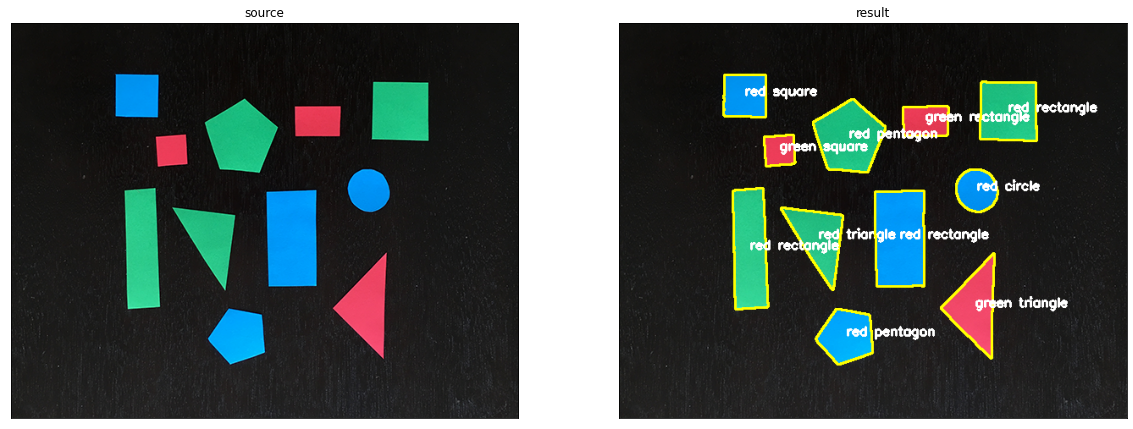

In [90]:
image_list = []
image = cv2.imread(os.path.join('images', 'q3.png'))
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])
image_list.append([cv2.cvtColor(detect_shape_color(image), cv2.COLOR_BGR2RGB), 'result', 'img'])
plotter(image_list, 1, 2, False, 20, 10, 'Q3')

# PART 4

**Point : 40 pts**

Here is for your helper functions(optional).

Please, set your structuring element here:

In [302]:
structuring_element = np.ones((9,9),np.uint8)
iteration_count = 10

Implement this function to dilate the input image with a square element without using the OpenCV methods.

In [303]:
def your_dilate(image, structuring_element):
    '''
    Applies your dilation.
    
    Parameters:
        image (numpy.ndarray): The input image.
        structuring_element (numpy.ndarray): The structuring element must be square.
    
    Returns:
        numpy.ndarray: The result image.
    '''
    
    result = image.copy()
    
    #Write your code here

    rows, cols = image.shape
    dim, _ = structuring_element.shape
    winthresh = dim//2

    for rep in range(iteration_count):
        ret,binary = cv2.threshold(result,127,255,cv2.THRESH_BINARY)
        for i in range(winthresh, rows-winthresh):
            for j in range(winthresh, cols-winthresh):
                window = binary[i-winthresh:i+winthresh, j-winthresh:j+winthresh]
                uniq = np.unique(window)
                if 255 in uniq:
                    result[i, j] = 255

    
    
    
    return result

Implement this function to erode the input image with a square element without using the OpenCV methods.

In [316]:
def your_erode(image, structuring_element):
    '''
    Applies your erosion.
    
    Parameters:
        image (numpy.ndarray): The input image.
        structuring_element (numpy.ndarray): The structuring element must be square.
    
    Returns:
        numpy.ndarray: The result image.
    '''
    
    result = image.copy()
    
    #Write your code here
    rows, cols = image.shape
    dim, _ = structuring_element.shape
    winthresh = dim//2

    for rep in range(iteration_count):
        ret,binary = cv2.threshold(result,127,255,cv2.THRESH_BINARY)
        for i in range(winthresh, rows-winthresh):
            for j in range(winthresh, cols-winthresh):
                window = binary[i-winthresh:i+winthresh, j-winthresh:j+winthresh]
                uniq = np.unique(window)
                if 0 in uniq:
                    result[i, j] = 0
    
    
    return result

Implement this function to dilate the input image with a square element using the OpenCV methods.

In [317]:
def cv_dilate(image, structuring_element):
    '''
    Applies OpenCV dilation.
    
    Parameters:
        image (numpy.ndarray): The input image.
        structuring_element (numpy.ndarray): The structuring element must be square.
    
    Returns:
        numpy.ndarray: The result image.
    '''
    
    result = image.copy()
    
    #Write your code here
    kernel = np.ones((5,5),np.uint8)
    dilation = cv2.dilate(image,structuring_element,iterations = iteration_count)

    
    return dilation

Implement this function to erode the input image with a square element using the OpenCV methods.

In [318]:
def cv_erode(image, structuring_element):
    '''
    Applys OpenCV erosion.
    
    Parameters:
        image (numpy.ndarray): The input image.
        structuring_element (numpy.ndarray): The structuring element must be square.
    
    Returns:
        numpy.ndarray: The result image.
    '''
    
    result = image.copy()
    
    #Write your code here
    kernel = np.ones((5,5),np.uint8)
    erosion = cv2.erode(image, structuring_element,iterations = iteration_count)
    
    
    
    return erosion

Test your implementation (don't change this cell).

time for your_dilate: 271.681169 s
time for cv_dilate: 0.007019 s
time for your_erode: 272.465743 s
time for cv_erode: 0.006017 s


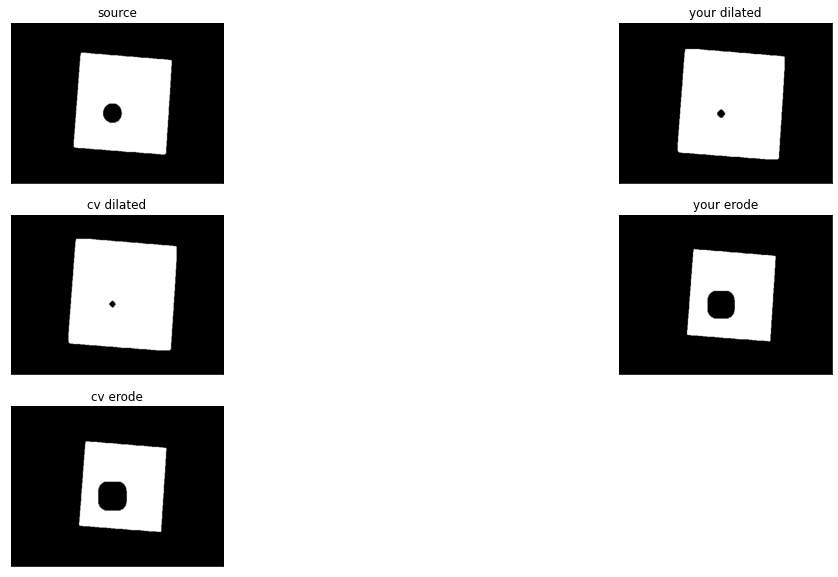

In [319]:
image_list = []
image = cv2.imread(os.path.join('images', 'q4.png'), cv2.IMREAD_GRAYSCALE)
image_list.append([image, 'source', 'img'])
t1 = time.time()
y_dilate = your_dilate(image, structuring_element)
t2 = time.time()
print('time for your_dilate: %f s' % (t2 - t1))
t1 = time.time()
c_dilate = cv_dilate(image, structuring_element)
t2 = time.time()
print('time for cv_dilate: %f s' % (t2 - t1))
t1 = time.time()
y_erode = your_erode(image, structuring_element)
t2 = time.time()
print('time for your_erode: %f s' % (t2 - t1))
t1 = time.time()
c_erode = cv_erode(image, structuring_element)
t2 = time.time()
print('time for cv_erode: %f s' % (t2 - t1))
image_list.append([y_dilate, 'your dilated', 'img'])
image_list.append([c_dilate, 'cv dilated', 'img'])
image_list.append([y_erode, 'your erode', 'img'])
image_list.append([c_erode, 'cv erode', 'img'])
plotter(image_list, 3, 2, True, 20, 10, 'Q4')

To create proper files for sending in the Quera run this cell, please.

In [320]:
!python notebook_converter.py

End!!!